In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


<function matplotlib.pyplot.show(close=None, block=None)>

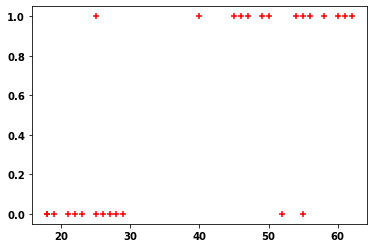

In [15]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',c='red')
plt.show

In [3]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size = 0.1)

In [4]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

C:\Users\mchetankumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
lgr.predict(X_test)

array([1, 1, 1], dtype=int64)

In [6]:
lgr.score(X_test,y_test)

1.0

In [7]:
lgr.predict_proba(X_test)

array([[0.27569542, 0.72430458],
       [0.32741452, 0.67258548],
       [0.38369616, 0.61630384]])

In [2]:
HR_df = pd.read_csv('HR_comma_sep.csv')
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
HR_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

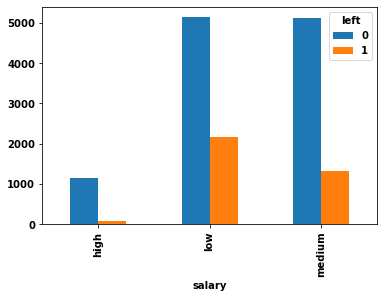

In [7]:
pd.crosstab(HR_df.salary,HR_df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

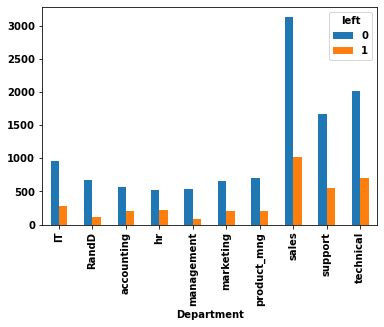

In [13]:
pd.crosstab(HR_df.Department,HR_df.left).plot(kind='bar')

In [14]:
X = HR_df.drop(['left','last_evaluation','number_project','time_spend_company','Work_accident','Department'],axis=1)
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [15]:
X.shape

(14999, 4)

In [16]:
y = HR_df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [17]:
transformer = ColumnTransformer(transformers=[('cat',OneHotEncoder(drop='first'),[3])],remainder='passthrough')
X = transformer.fit_transform(X)
X

array([[1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [18]:
X.shape

(14999, 5)

In [19]:
y.shape

(14999,)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [24]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [25]:
lgr.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
lgr.score(X_test,y_test)

0.7886666666666666